In [1]:
import numpy as np
import nibabel as nb
import os
from nilearn.image import threshold_img
from joblib import Parallel, delayed
from nilearn import plotting

In [5]:
# Load sample image f'sub-{subject}_STAB.npy'
example_func = nb.load('/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_04_musicnoise_bold/func_clean/sub-01_ses-01_task-02a_run-1_cleaned.nii.gz')
STAB_data = np.load('/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_08_stability_musicnoise_bold/stab_full/sub-03_STAB.npy')

In [65]:
# estimate mean stability map
STAB_mean_img = nb.Nifti1Image(STAB_data, example_func.affine, example_func.header)

# threshold the stability map
thres = 0.175
STAB_mean_img_thr = threshold_img(STAB_mean_img, threshold=thres)

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/plotting/html_document.py:102: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn(



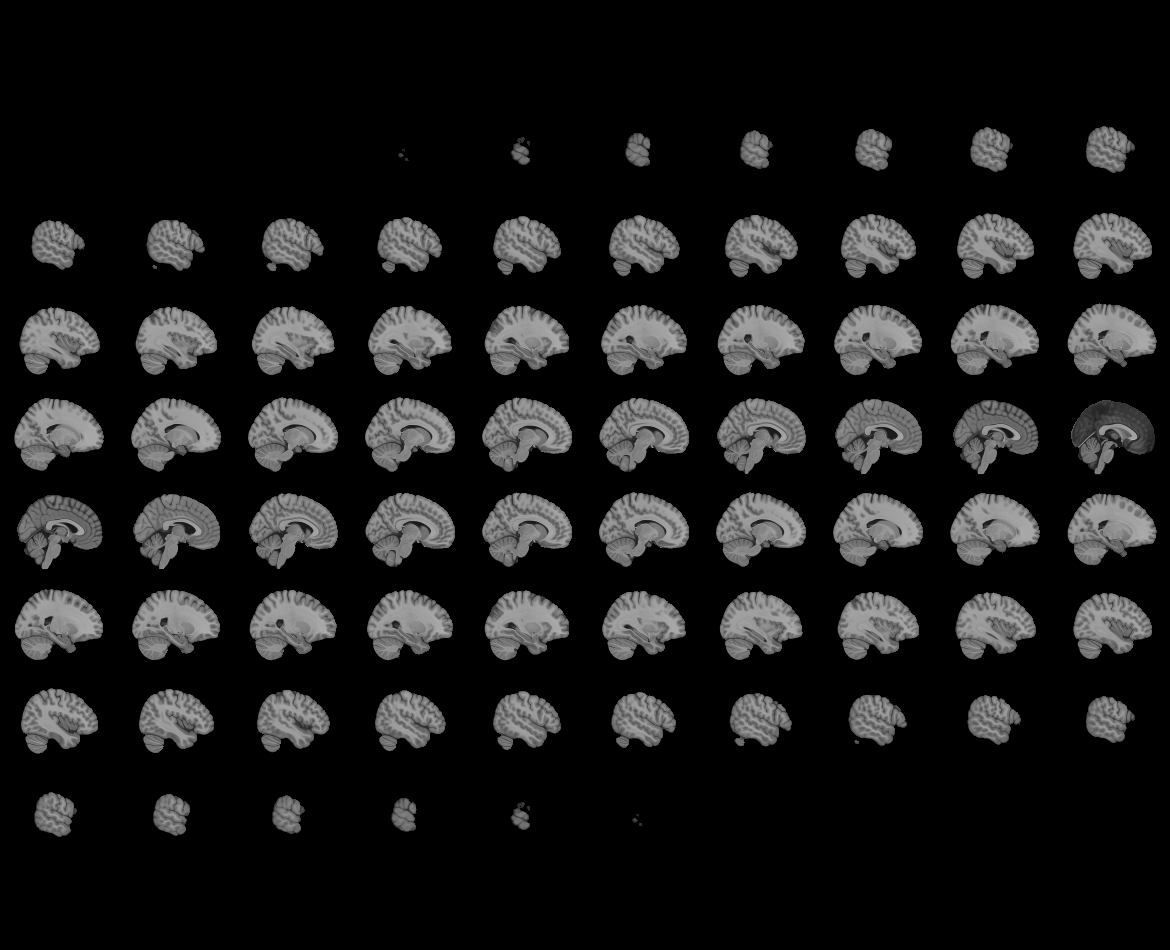
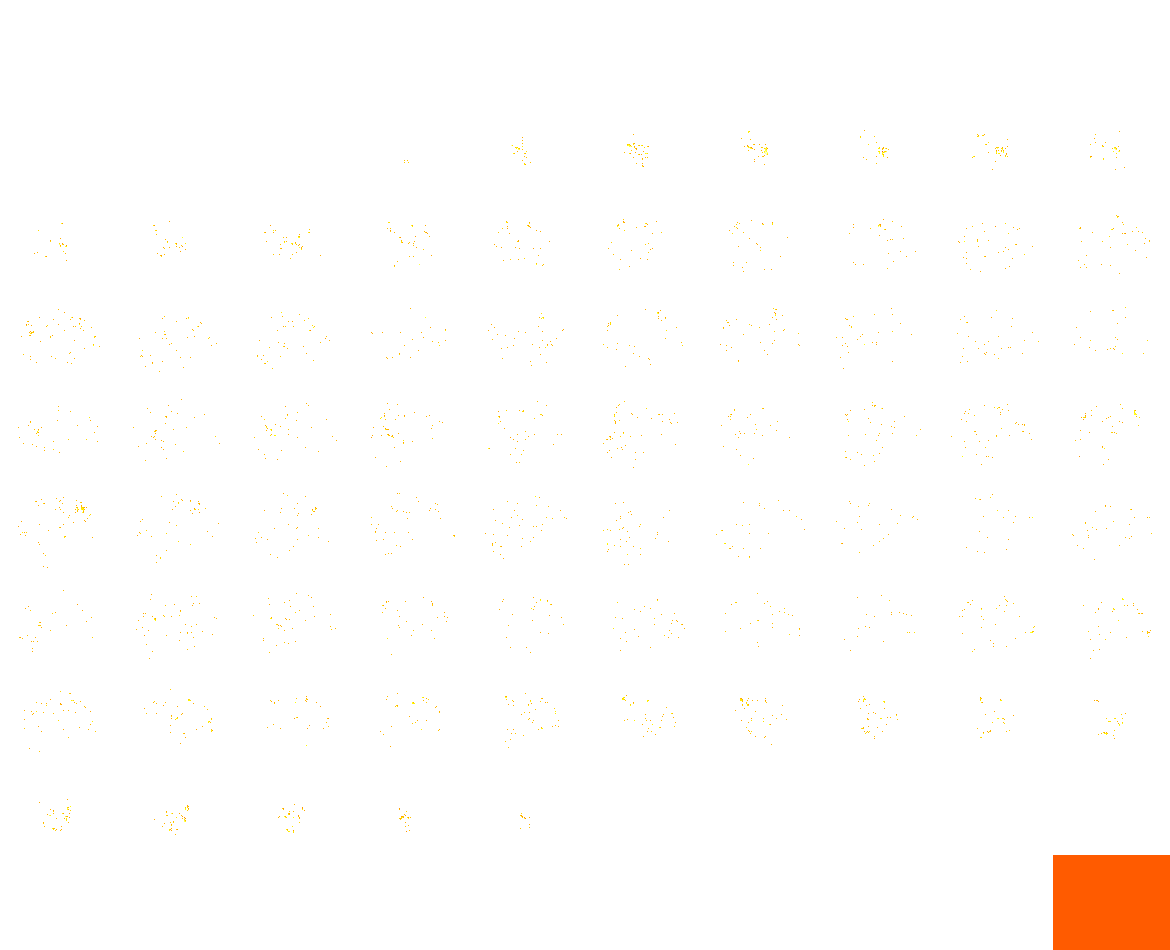

In [66]:
# plot STAB_mean_img_thr with view_img
plotting.view_img(STAB_mean_img_thr, title='STAB', colorbar=True, cmap='hot')

In [67]:
#count number of voxels > 0
print(np.sum(STAB_mean_img_thr.get_fdata() > 0))

2626


## Across subjects - 9 emotions

In [85]:
# Load all *_STAB.npy files in stab_folder
data_root = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2'
stab_mask_dir = os.path.join(data_root, 'derivatives', 'mvpa_08_stability_musicnoise_bold', 'stab_full')

STAB_files = [os.path.join(stab_mask_dir, f) for f in os.listdir(stab_mask_dir) if f.endswith('_STAB.npy') & f.startswith('sub-')]
STAB_files.sort()

In [86]:
n_subjects = len(STAB_files)
n_subjects

17

In [87]:
# load all STAB files
from nilearn import image
STAB = np.zeros((97, 115, 97, n_subjects))
thres_stab = 0.175
#thres_stab = 0.2
for ii, f in enumerate(STAB_files):

    stab_mask_data = np.load(f)
    stab_mask_img = nb.Nifti1Image(stab_mask_data, example_func.affine, example_func.header)
    stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres_stab)
    stab_mask_img_thres_bin = image.binarize_img(stab_mask_img_thres)

    STAB[..., ii] = stab_mask_img_thres_bin.get_fdata()

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1106: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)


In [88]:
# compute the mean stability
STAB_mean = np.sum(STAB, axis=3)

In [89]:
# estimate mean stability map
STAB_mean_img = nb.Nifti1Image(STAB_mean, example_func.affine, example_func.header)

# threshold the stability map
thres = 2
STAB_mean_img_thr = threshold_img(STAB_mean_img, threshold=thres)

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/plotting/html_document.py:102: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn(



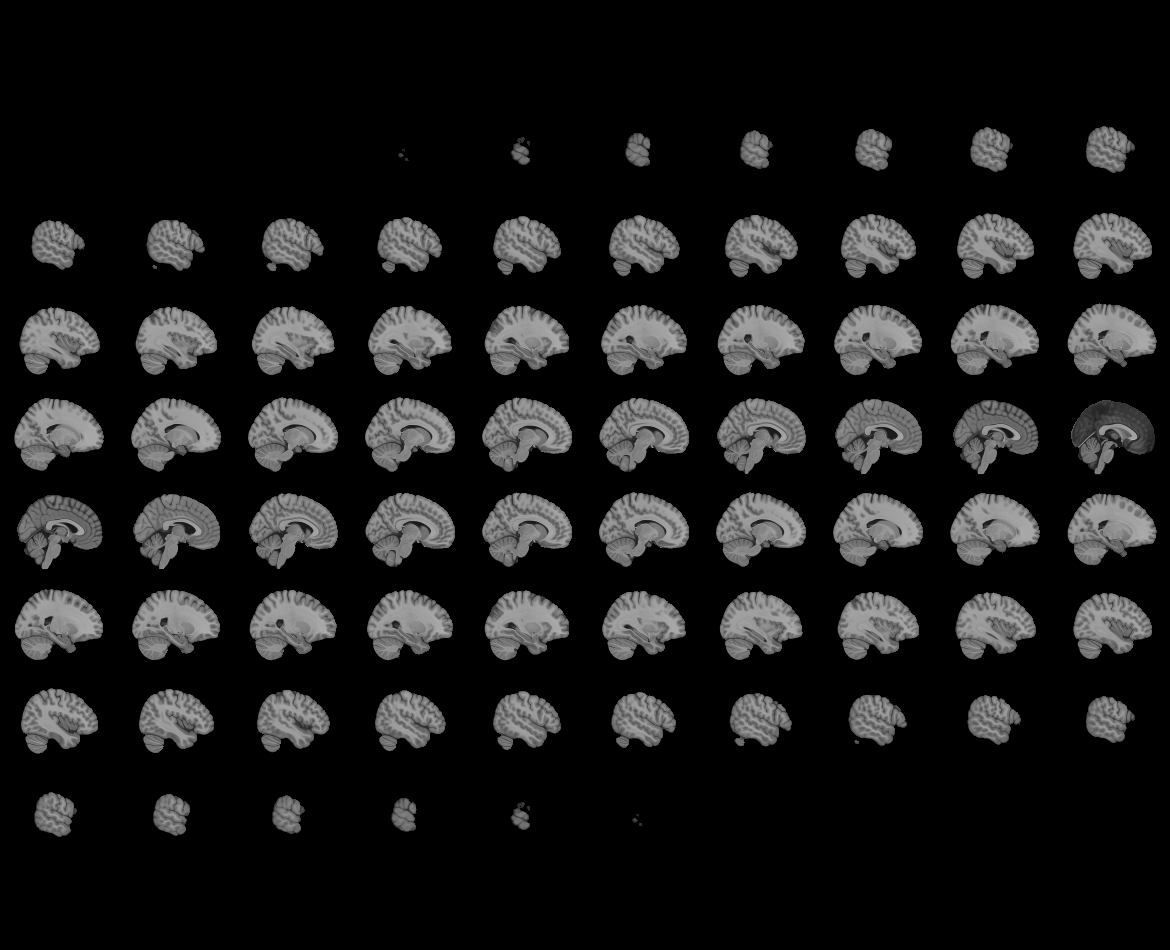
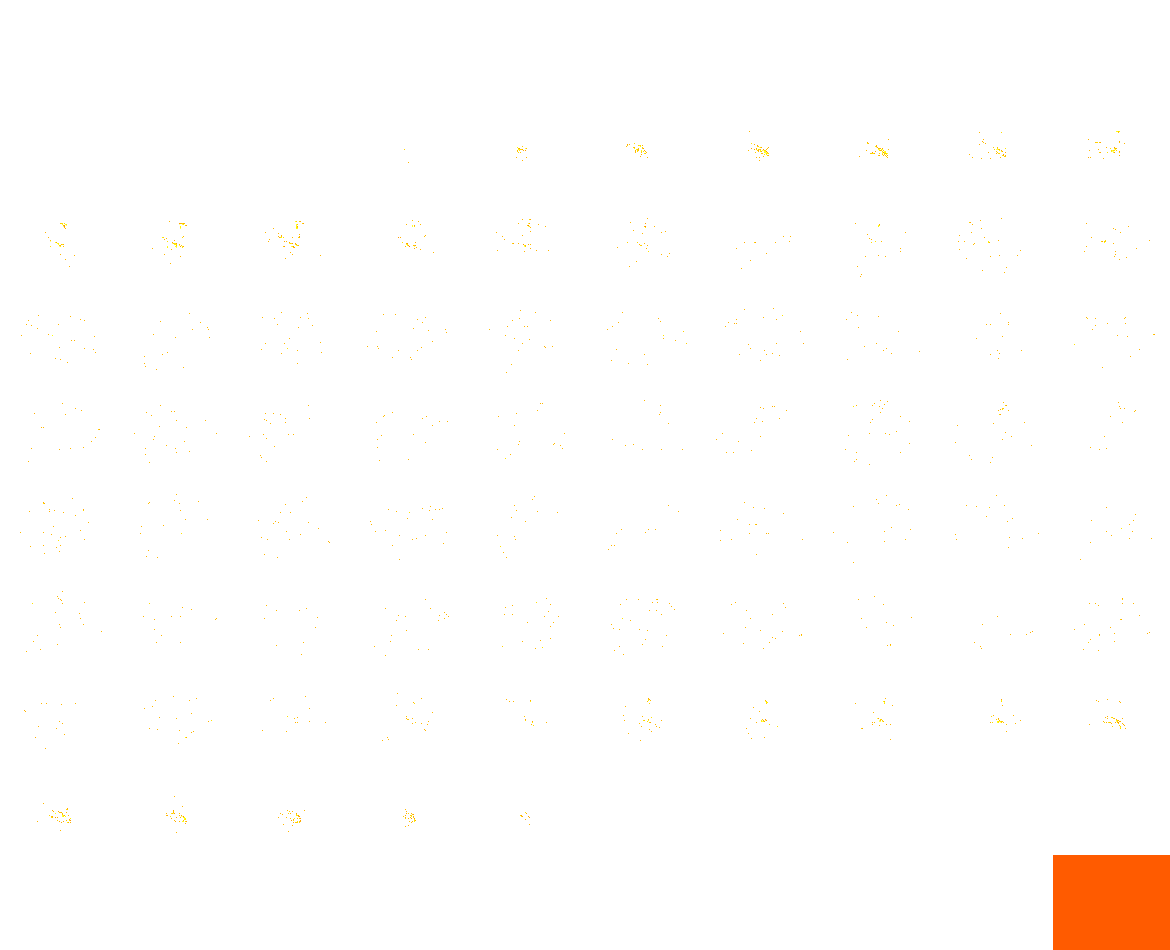

In [90]:
# plot STAB_mean_img_thr with view_img
plotting.view_img(STAB_mean_img_thr, title='STAB', colorbar=True, cmap='hot')

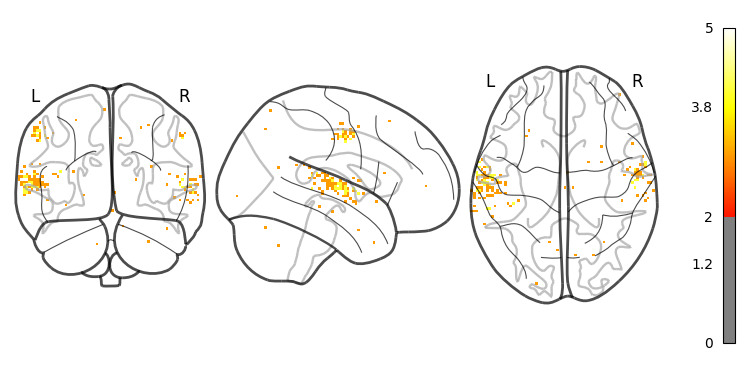

In [91]:
plotting.plot_glass_brain(STAB_mean_img_thr, colorbar=True, cmap='hot', threshold=thres)

## Across subjects - music vs. noise

In [2]:
# Load all *_STAB.npy files in stab_folder
data_root = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2'
stab_mask_dir = os.path.join(data_root, 'derivatives', 'mvpa_08_stability_musicnoise_bold', 'stab')

STAB_files = [os.path.join(stab_mask_dir, f) for f in os.listdir(stab_mask_dir) if f.endswith('_STAB.npy') & f.startswith('sub-')]
STAB_files.sort()

In [3]:
n_subjects = len(STAB_files)
n_subjects

17

In [6]:
# load all STAB files
from nilearn import image
STAB = np.zeros((97, 115, 97, n_subjects))
thres_stab = 0.175
#thres_stab = 0.2
for ii, f in enumerate(STAB_files):

    stab_mask_data = np.load(f)
    stab_mask_img = nb.Nifti1Image(stab_mask_data, example_func.affine, example_func.header)
    stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres_stab)
    stab_mask_img_thres_bin = image.binarize_img(stab_mask_img_thres)

    STAB[..., ii] = stab_mask_img_thres_bin.get_fdata()

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1106: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)


In [7]:
# compute the mean stability
STAB_mean = np.sum(STAB, axis=3)

In [8]:
# estimate mean stability map
STAB_mean_img = nb.Nifti1Image(STAB_mean, example_func.affine, example_func.header)

# threshold the stability map
thres = 2
STAB_mean_img_thr = threshold_img(STAB_mean_img, threshold=thres)

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



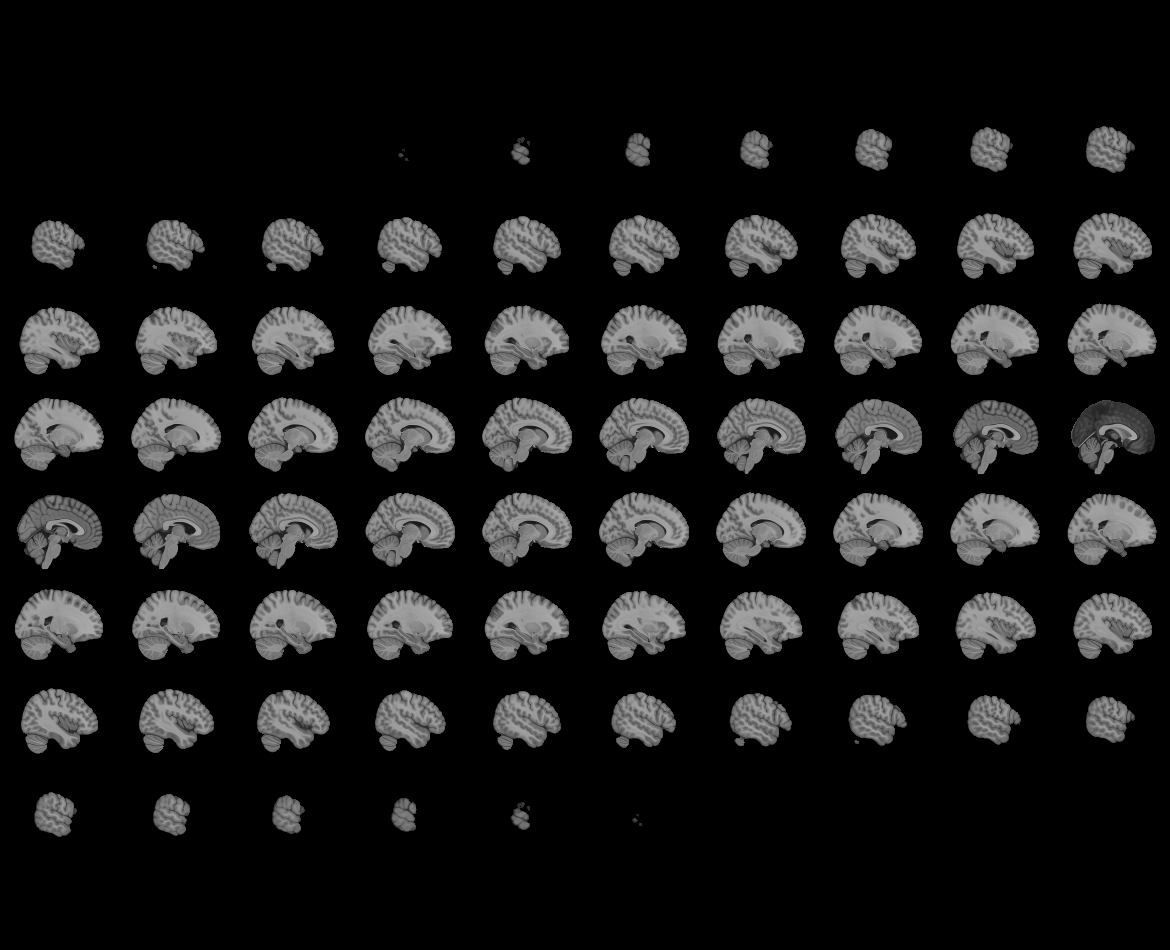
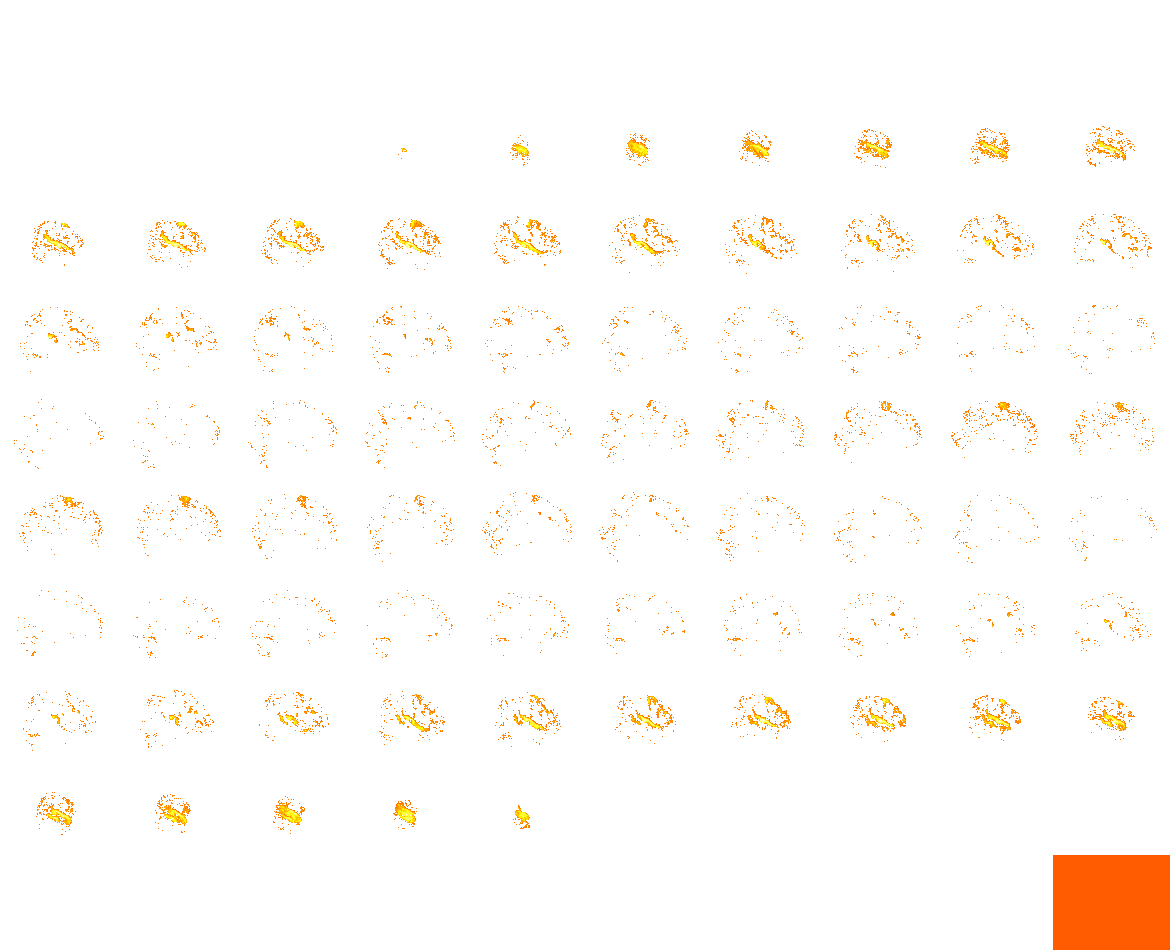

In [9]:
# plot STAB_mean_img_thr with view_img
plotting.view_img(STAB_mean_img_thr, title='STAB', colorbar=True, cmap='hot')

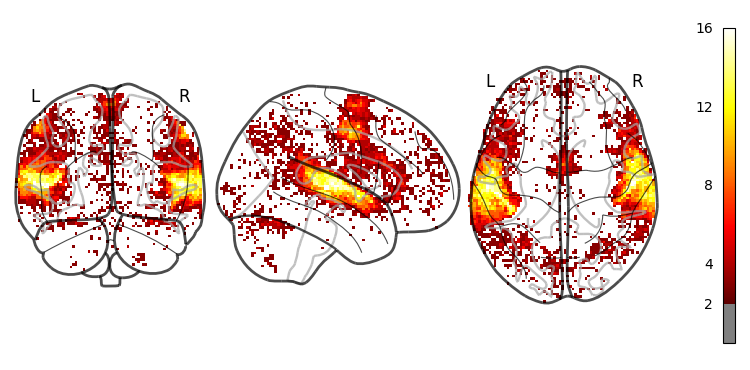

In [10]:
plotting.plot_glass_brain(STAB_mean_img_thr, colorbar=True, cmap='hot', threshold=thres)